In [13]:
#McDonald's India-Menu Nutrition Facts

#DATA ANALYSIS



#install required libraris
!pip install ipython-sql
!pip install pandas
!pip install numpy


#IMPORTING REQUIRED LIBRARIES

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.subplots import make_subplots
import numpy as np
import csv 







In [44]:
#read csv file where Menu nutrition data is avialable 


nutrition_data = pd.read_csv("India_Menu.csv")
nutrition_data.head()


,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [45]:

nutrition_data.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


In [46]:
#null value distribution 

nutrition_data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [48]:
#create connection object 


conn = sqlite3.connect("McDonalds.db")

#connvert the csv file into SQL table 

nutrition_data.to_sql("McDonalds_nutrition", conn)



141

In [49]:
#read data from database using pandas 

df = pd.read_sql("select * from McDonalds_nutrition", conn)
df

,index,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


In [50]:
df.describe(include= 'all')

,index,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141,141,141,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
unique,NaN,7,141,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,McCafe Menu,McVeggie™ Burger,544 ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,51,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,70.000000,NaN,NaN,NaN,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,40.847277,NaN,NaN,NaN,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,NaN,NaN,NaN,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,70.000000,NaN,NaN,NaN,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,105.000000,NaN,NaN,NaN,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000


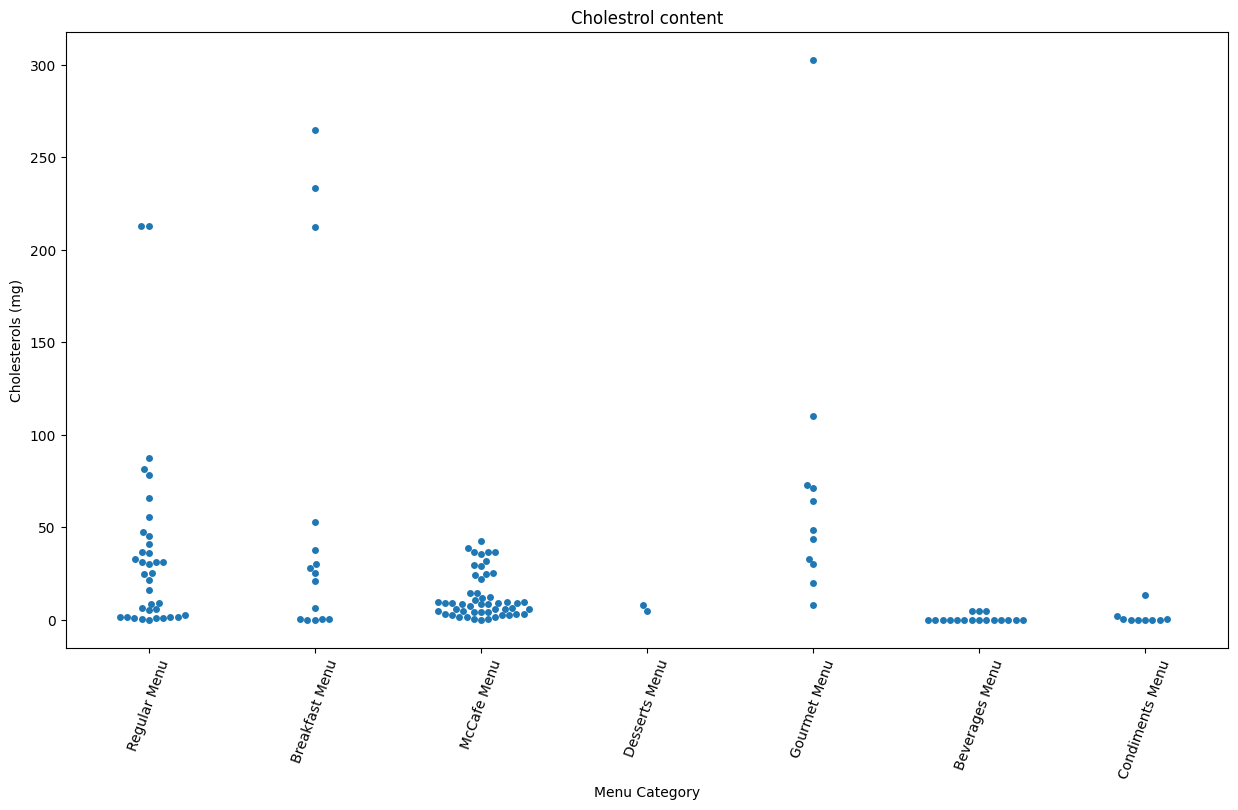

In [59]:
#which food has highest Cholesterols content?

%matplotlib inline

#catagorical scatterplot
plt.figure(figsize=(15, 8))  # Adjust width and height as needed

plot = sns.swarmplot(x = 'Menu Category', y = 'Cholesterols (mg)', data =df)

#if we plot graph just with above info, menu category labels will overlap since there are few which don't fit horizontally
#there for use matplotlib.plotly as plt to rotate the labels 

plt.setp(plot.get_xticklabels(), rotation=70)

#add title to graph 

plt.title("Cholestrol content")

#show the graph 
plt.show()



In [60]:
#lets find out which food item has highest cholestrol content 

#first lets fing out max amount of cholestrol
df['Cholesterols (mg)'].describe()

count    141.000000
mean      26.350071
std       50.334200
min        0.000000
25%        1.510000
50%        8.390000
75%       31.110000
max      302.610000
Name: Cholesterols (mg), dtype: float64

In [61]:
#lets find out which row item as highest cholestrol content using idxmax() 


df['Cholesterols (mg)'].idxmax()

109

In [62]:
#now we got row index number which as highest cholestrol content now lets find the food item

df.at[109, 'Menu Items']

'McSpicy Premium Chicken Burger'

In [63]:
df = pd.read_sql("select * from McDonalds_nutrition", conn)
df

,index,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


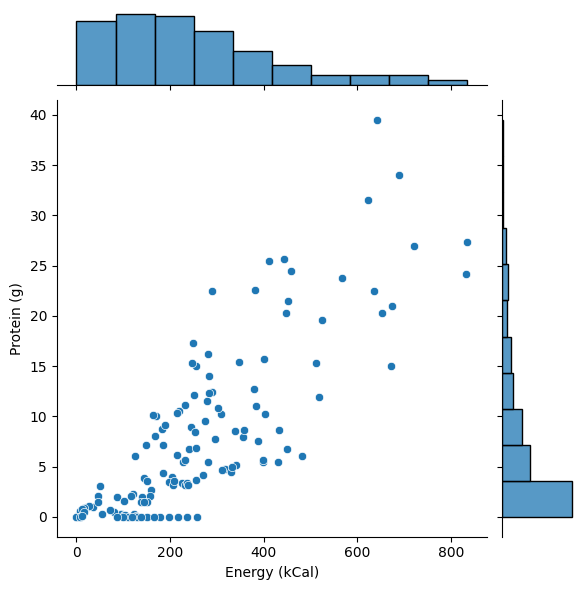

In [65]:
#data exploration using visualization 

plot = sns.jointplot(x = 'Energy (kCal)', y= 'Protein (g)', data = df)


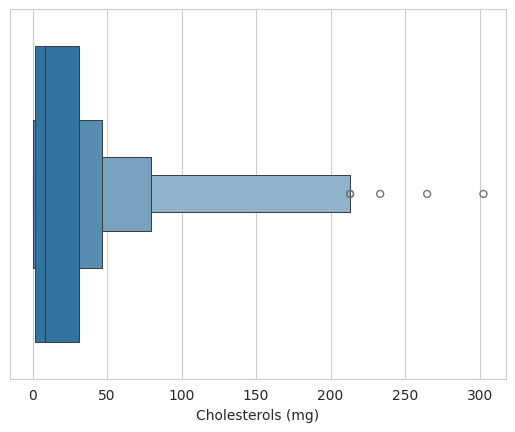

In [66]:
#lets fing outliers

plot = sns.set_style("whitegrid")
plot_graph = sns.boxenplot(x = df['Cholesterols (mg)'])

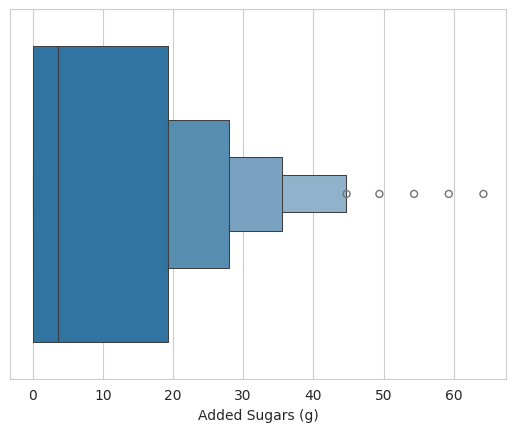

In [68]:
plot = sns.set_style("whitegrid")
plot_graph = sns.boxenplot(x = df['Added Sugars (g)'])